<a href="https://colab.research.google.com/github/ri1965/Toolkits/blob/main/Dciccionarios_TP_Gr%C3%A1ficos_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/al34n1x/DataScience/blob/master/1.Intro/appendix.Ejercicios_Diccionario_Archivos.ipynb

import csv

clientesPath = './clientesDB.csv'
pedidosPath = './pedidosDB.csv'
fieldnamesClientes = ['idCliente','razon_social','cuit','direccion']
fieldnamesPedidos = ['idPedido','producto','cantidad']

def ultimaID(path):
  try:
    row = 1
    with open(path, mode = 'r') as f:
      reader = csv.DictReader(f, delimiter = ',')
      for line in reader:
        row += 1
  except FileNotFoundError:
    row = 1
  return row



def cargaClientes():
    dic = {}
    print("ingrese los datos del user")
    dic['idCliente'] = ultimaID(clientesPath)
    dic['razon_social'] = input("Razon Social: ")
    dic['cuit'] = input("Cuit: ")
    dic['direccion'] = input("Direccion: ")

    return dic

def escribirDict(path,dict,fieldnames):
    if dict == 0:
        print('Error')
        return 0
    with open(path,'a',newline='') as f:
        writer = csv.DictWriter(f,fieldnames=fieldnames)
        if f.tell() == 0:  #file.tell() devuelve la posicion actual del archivo, si es igual a 0 es porq no tiene header
            writer.writeheader()
        writer.writerow(dict)

def buscarIdCliente(id):
        file = csv.DictReader(open(clientesPath))
        for row in file:
            if row['idCliente'] == id:
                return True  
        return False

def cargaPedido():
    dic = {}
    dic['idPedido'] = input('idPedido: ')
    if not buscarIdCliente(dic['idPedido']):
        print('no se encontro el ID de cliente: ' + dic['idPedido'])
        return 0
    dic['producto'] = input('Producto: ')
    dic['cantidad'] = input('Cantidad: ')
    return dic

def buscarCliente():
    while True: 
        busqueda = input("1: Buscar por Razón Social\n2: Buscar por CUIT\n3: Buscar por dirección\n") 
        if busqueda == "1":
            claveBusqueda = "razon_social"
            datoBusqueda = input("Ingrese la Razón Social:\n")
            devuelveCliente(claveBusqueda, datoBusqueda)
            break
        elif busqueda == "2":
            claveBusqueda = "cuit"
            datoBusqueda = input("Ingrese el número de CUIT:\n")
            devuelveCliente(claveBusqueda, datoBusqueda)
            break
        elif busqueda == "3":
            claveBusqueda = "direccion"
            datoBusqueda = input("Ingrese el número de CUIT:\n")
            devuelveCliente(claveBusqueda, datoBusqueda)
            break
        else:
            print("Ingresó un número erróneo")

def devuelveCliente(claveBusqueda, datoBusqueda):            
    with open(clientesPath, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        
        for row in csv_reader:
            if row[claveBusqueda] == datoBusqueda:
                print(row)

def buscarPedido():
    while True: 
        busqueda = input("1: Buscar por ID\n2: Pedido\n3: Cantidad\n") 
        if busqueda == "1":
            claveBusqueda = "idPedido"
            datoBusqueda = input("Ingrese ID:\n")
            devuelvePedido(claveBusqueda, datoBusqueda)
            break
        elif busqueda == "2":
            claveBusqueda = "producto"
            datoBusqueda = input("Producto:\n")
            devuelvePedido(claveBusqueda, datoBusqueda)
            break
        elif busqueda == "3":
            claveBusqueda = "cantidad"
            datoBusqueda = input("Cantidad:\n")
            devuelvePedido(claveBusqueda, datoBusqueda)
            break
        else:
            print("Ingresó un número erróneo")

def devuelvePedido(claveBusqueda, datoBusqueda):            
    with open(pedidosPath, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        
        for row in csv_reader:
            if row[claveBusqueda] == datoBusqueda:
                print(row)

def mostrarTablas():
    import csv
    # se pide ingresar la opcion a visualizar, para clientes 1, para pedidos 2
    n=int(input('si desea ver los Clientes ingrese 1, si desea ver los Pedidos ingrese 2: '))
    if n==1:
        ruta = './clientesDB.csv'
    elif n==2:
        ruta = './pedidosDB.csv'
    else:
        print("ingrese una opcion valida")
    with open(ruta, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in reader:
            print(', '.join(row))


def buscarPedido():

    claveBusqueda = input("Ingrese la Razón Social: ") 
    with open(clientesPath, mode='r') as csv_file:
      csv_reader = csv.DictReader(csv_file)
      for row in csv_reader:
          if row['razon_social'] == claveBusqueda:
            datoBusqueda = row['idCliente']


    devuelvePedido(datoBusqueda)
    
def devuelvePedido(datoBusqueda):            
    with open(pedidosPath, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        
        for row in csv_reader:
            if row['idPedido'] == datoBusqueda:
                print(f'El producto es {row["producto"]}, cantidad: {row["cantidad"]}')

def main():
    while True:
        userInput = input("ingrese c para cargar cliente\n p para cargar pedido\n v para ver data de cliente o de pedidos\n vcp para ver pedidos por clientes\n ")
        if( userInput == 'c'):
                cliente = cargaClientes()
                escribirDict(clientesPath,cliente,fieldnamesClientes)
        elif(userInput == 'p'):
            pedido = cargaPedido()
            escribirDict(pedidosPath,pedido,fieldnamesPedidos)
        elif(userInput == 'v'):
            pedido = mostrarTablas()
        elif userInput == 'vcp':
            buscarPedido()
        else:
            break


main()

ingrese c para cargar cliente
 p para cargar pedido
 v para ver data de cliente o de pedidos
 vcp para ver pedidos por clientes
 


# Consignas del TP

Ejercicios Diccionarios y archivos


Una empresa de logística posee una base de clientes con la siguiente información:
- idClient: (int)
  - Razon Social: (string)
  - cuit: (string)
  - direccion: (string)


Por otro lado, la empresa cuenta con una base de los pedidos realizados por los clientes, dicha base cuenta con la siguiente estructura:
idPedido: (int)
  - idCliente: (int)
  - producto: (string)
  - cantidad: (int)


Completar los siguiente Ítems:
1. Crear una función que permita la carga de clientes y los guarde en un archivo (Utilizar manejo de excepciones)
2. Crear una función que permita la carga de pedidos y los guarde en un archivo (Utilizar manejo de excepciones)
3. Crear una función que imprima por pantalla el listado de clientes.
4. Crear una función que imprima por pantalla el listado de pedidos.
5. [BONUS] Crear una función que le pase el id or razón social de un cliente y me liste todos los pedidos realizados.



## Importamos libreria csv y creamos las constantes

In [ ]:
import csv

clientesPath = './content/sample_data/clientesDB.csv'
pedidosPath = './pedidosDB.csv'
fieldnamesClientes = ['idClient','Razon Social','Cuit','Direccion']
fieldnamesPedidos = ['idPedido','Producto','Cantidad']

## Función `ultimaID(path)`

Toma como parámetro el path del archivo a trabajar. 

Realiza la suma de todas las líneas recorriendo el `csv` con lo que la suma de `row` es el último `id` se de cliente o pedidos. 

In [ ]:
def ultimaID(path):
  try:
    row = 1
    with open(path, mode = 'r') as f:
      reader = csv.DictReader(f, delimiter = ',')
      for line in reader:
        row += 1
  except FileNotFoundError:
    row = 1
  return row


## Función `cargaClientes()`
Empieza definiendo un diccionario vacio y 
- adjudica a idCliente el valor 

- Pide los datos del `csv` de los clientes
  - Razón Social
  - Cuit
  - Dirección

In [ ]:
def cargaClientes():
    dic = {}
    print("ingrese los datos del user")
    dic['idClient'] = ultimaID(clientesPath)
    dic['Razon Social'] = input("Razon Social: ")
    dic['Cuit'] = input("Cuit: ")
    dic['Direccion'] = input("Direccion: ")

    return dic

## Función `escribirDict(path,dict,fieldnames)`

Toma como parámetros
- `path` es el path correspondiente al archivo en donde se va a grabar el `csv` 
- `dict` es el diccionario que toma los datos para generar el `csv``
- `fieldnames` es una lista con los nombres de campos que van a ser el encabezado del csv

Se realiza una primer verificación que imprime `Error` si no existe el diccionario pasado como parámetro.

Utiliza el método `.tell()` para verificar si existe el encabezado o no.

Agrega los datos del diccionario al `csv`

In [ ]:
def escribirDict(path,dict,fieldnames):
    if dict == 0:
        print('Error')
        return 0
    with open(path,'a',newline='') as f:
        writer = csv.DictWriter(f,fieldnames=fieldnames)
        if f.tell() == 0:  #file.tell() devuelve la posicion actual del archivo, si es igual a 0 es porq no tiene header
            writer.writeheader()
        writer.writerow(dict)

## Función `buscaIdCliente(id)`

Toma el parámetro id.

Pasa los datos del `csv` a una variable abierto como diccionario y recorre las filas cotejando si idCliente es igual al ingresado como parámetro.

Devuelve `True` o `False`


In [ ]:
def buscarIdCliente(id):
        file = csv.DictReader(open(clientesPath))
        for row in file:
            if row['idClient'] == id:
                return True
        
        return False

## Función `cargaPedido()`

Empieza definiendo un diccionario vacio y 
- adjudica a idPedido el valor ingresado por el usuario

- Utiliza la función `buscarIdCliente`que toma como parámetro el `idPedido`
    
- Ingreso por el usuario de
  - `Producto`
  - `Cantidad`

Devuelve el diccionario

In [ ]:
def cargaPedido():
    dic = {}
    dic['idPedido'] = input('idPedido: ')
    if not buscarIdCliente(dic['idPedido']):
        print('no se encontro el ID de cliente: ' + dic['idPedido'])
        return 0
    dic['Producto'] = input('Producto: ')
    dic['Cantidad'] = input('Cantidad: ')

    return dic

## Funcion de búsqueda de pedidos

In [ ]:
def mostrarTablas():
    import csv
    # se pide ingresar la opcion a visualizar, para clientes 1, para pedidos 2
    n=int(input('si desea ver los Clientes ingrese 1, si desea ver los Pedidos ingrese 2: '))
    if n==1:
        ruta = './clientesDB.csv'
    elif n==2:
        ruta = './pedidosDB.csv'
    else:
        print("ingrese una opcion valida")
    with open(ruta, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in reader:
            print(', '.join(row))


## Buscar Pedido según Razón Social

In [ ]:
def buscarPedido():

    claveBusqueda = input("Ingrese la Razón Social: ") 
    with open(clientesPath, mode='r') as csv_file:
      csv_reader = csv.DictReader(csv_file)
      for row in csv_reader:
          if row['razon_social'] == claveBusqueda:
            datoBusqueda = row['idClient']

    devuelvePedido(datoBusqueda)
    

In [ ]:
def devuelvePedido(datoBusqueda):            
    with open(pedidosPath, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        
        for row in csv_reader:
            if row['idPedido'] == datoBusqueda:
                print(f'El producto es {row["producto"]}, cantidad: {row["cantidad"]}')


## Función `main()`

Permite que usuario ingrese la opción para agregar cliente, pedido o ver resultado de búsqueda por cliente / pedido.




In [ ]:
def main():
    while True:
        userInput = input("ingrese c para cargar cliente, p para cargar pedido, vc para ver el data de cliente o vp para ver data de pedidos")
        if( userInput == 'c'):
                cliente = cargaClientes()
                escribirDict(clientesPath,cliente,fieldnamesClientes)
        elif(userInput == 'p'):
            pedido = cargaPedido()
            escribirDict(pedidosPath,pedido,fieldnamesPedidos)
        elif(userInput == 'vc'):
            pedido = buscarCliente()
        elif(userInput == 'vp'):
            pedido = buscarPedido()
        else:
            break

In [7]:
import csv
def creaDictCliente():

  dic = {}
  dic_data = {}
  with open('/content/sample_data/clientesDB.csv', mode='r', encoding="utf8", errors='ignore') as csv_file:
      csv_reader = csv.DictReader(csv_file)
      for row in csv_reader:
          idCliente = row ['idCliente'] #Obtenemos el legajo y lo utilizamos como Key del diccionario padre
          # Tomamos los siguientes datos y los guardamos en diferentes variables
          razon_social = row["razon_social"]
          cuit = row ["cuit"]
          direccion = row ["direccion"]
          localidad = row['localidad']

          dic_datos = {'razon_social':razon_social,
                'cuit':cuit,
                'direccion':direccion,
                'localidad': localidad
                }
          # Creamos el diccionario completo con el legajo como Key
          dic[idCliente] = dic_datos
  return dic



In [8]:
dic_cliente = creaDictCliente()
dic_cliente

{'1': {'cuit': '11223334445',
  'direccion': 'Benavidez',
  'localidad': 'PBA',
  'razon_social': 'Walmart'},
 '10': {'cuit': '78754232569',
  'direccion': 'Liniers',
  'localidad': 'CABA',
  'razon_social': 'Office Depot'},
 '2': {'cuit': '28769696366',
  'direccion': 'Congreso',
  'localidad': 'CABA',
  'razon_social': 'Jumbo'},
 '3': {'cuit': '23567776654',
  'direccion': 'Villa Ballester',
  'localidad': 'CABA',
  'razon_social': 'Casa Tia'},
 '4': {'cuit': '67676544347',
  'direccion': 'Florida',
  'localidad': 'PBA',
  'razon_social': 'Disco'},
 '5': {'cuit': '22334567797',
  'direccion': 'Ensenada',
  'localidad': 'PBA',
  'razon_social': 'Chango Mas'},
 '6': {'cuit': '56654345684',
  'direccion': 'Tigre',
  'localidad': 'PBA',
  'razon_social': 'Vea'},
 '7': {'cuit': '77865677652',
  'direccion': 'Villa Luro',
  'localidad': 'CABA',
  'razon_social': 'Easy'},
 '8': {'cuit': '66764543464',
  'direccion': 'Lugano',
  'localidad': 'CABA',
  'razon_social': 'Sodimac'},
 '9': {'cuit

In [ ]:
def creaDictPedido():

  dic = {}
  dic_data = {}
  with open('/content/sample_data/pedidosDB.csv', mode='r', encoding="utf8", errors='ignore') as csv_file:
      csv_reader = csv.DictReader(csv_file)
      for row in csv_reader:
          idPedido = row ['idPedido'] #Obtenemos el legajo y lo utilizamos como Key del diccionario padre
          # Tomamos los siguientes datos y los guardamos en diferentes variables
          idCliente = row["idCliente"]
          producto = row ["producto"]
          cantidad = row ["cantidad"]

          dic_datos = {'idCliente':idCliente,
                'producto':producto,
                'cantidad':cantidad
                }
          # Creamos el diccionario completo con el legajo como Key
          dic[idPedido] = dic_datos
  return dic


In [ ]:
dic_pedido = creaDictPedido()
dic_pedido

{'1': {'cantidad': '2', 'idCliente': '1', 'producto': 'papa'},
 '10': {'cantidad': '6', 'idCliente': '7', 'producto': 'tornillos'},
 '11': {'cantidad': '7', 'idCliente': '4', 'producto': 'remolacha'},
 '12': {'cantidad': '2', 'idCliente': '3', 'producto': 'remolacha'},
 '13': {'cantidad': '3', 'idCliente': '4', 'producto': 'uva'},
 '14': {'cantidad': '5', 'idCliente': '5', 'producto': 'tomate'},
 '15': {'cantidad': '2', 'idCliente': '7', 'producto': 'notebook'},
 '16': {'cantidad': '3', 'idCliente': '8', 'producto': 'mouse'},
 '17': {'cantidad': '4', 'idCliente': '4', 'producto': 'papa'},
 '18': {'cantidad': '5', 'idCliente': '3', 'producto': 'batata'},
 '19': {'cantidad': '4', 'idCliente': '4', 'producto': 'batata'},
 '2': {'cantidad': '3', 'idCliente': '1', 'producto': 'tomate'},
 '20': {'cantidad': '5', 'idCliente': '5', 'producto': 'uva'},
 '21': {'cantidad': '6', 'idCliente': '7', 'producto': 'mouse'},
 '22': {'cantidad': '7', 'idCliente': '8', 'producto': 'lcd'},
 '23': {'cantida

# Templates de Gráficos

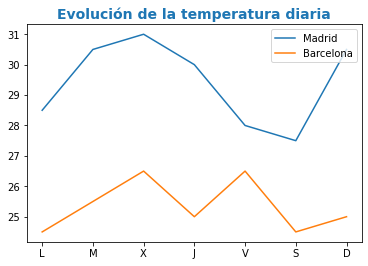

In [1]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.subplots()
dias = ['L', 'M', 'X', 'J', 'V', 'S', 'D']
temperaturas = {'Madrid':[28.5, 30.5, 31, 30, 28, 27.5, 30.5], 'Barcelona':[24.5, 25.5, 26.5, 25, 26.5, 24.5, 25]}
ax.plot(dias, temperaturas['Madrid'], label = 'Madrid')
ax.plot(dias, temperaturas['Barcelona'], label = 'Barcelona')
ax.set_title('Evolución de la temperatura diaria', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.legend(loc = 'upper right')
plt.show()

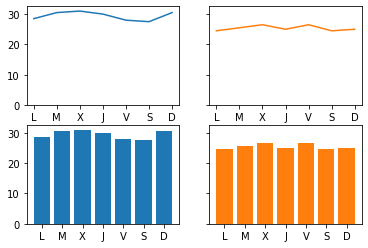

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.subplots(2, 2, sharey = True)
dias = ['L', 'M', 'X', 'J', 'V', 'S', 'D']
temperaturas = {'Madrid':[28.5, 30.5, 31, 30, 28, 27.5, 30.5], 'Barcelona':[24.5, 25.5, 26.5, 25, 26.5, 24.5, 25]}
ax[0, 0].plot(dias, temperaturas['Madrid'])
ax[0, 1].plot(dias, temperaturas['Barcelona'], color = 'tab:orange')
ax[1, 0].bar(dias, temperaturas['Madrid'])
ax[1, 1].bar(dias, temperaturas['Barcelona'], color = 'tab:orange')
plt.show()